In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numba
from scipy import integrate
from IPython.display import Image 
%matplotlib notebook
plt.ioff()

# Prerequisites and objectives

## Prerequisites
* To calculate the exact solution of a differential equation with separable variables, linear of the first or second order


* Integration


* Basic laws of physics

## Objectives 

* To transform a differential equation of order $p \in \mathbb{N}$ into a system of order 1


* To identify the nature of an ODE, the state variables characterizing it


* To use the methods of Euler, Taylor and Runge Kutta


* To know their respective advantages and disadvantages and choose the method best suited to the problem considered.


* To program them and know the predefined solvers most used in Python.


* To analyze and interpret the results of the model

# Differential Equations 

* Widely used in physics


* Closed form solutions only in particular cases


* Need for numerical solvers

They correspond to the mathematical formulation of the physical problem studied. It is often complicated to find an exact solution to the continuous problem. The interest of numerical methods is to be able to approach the solution of the problem.

We will remember the two key steps to go from the physical problem to the calculation program that solves it : 


- **modelling** (mathematical model described by a ODE system)


- **numerical approximation** (transition from continuous to discretized problem formulation that can be programmed on a computer) 


# Two classes of differential equations 

## Ordinary differential equations (ODE)

Derivatives of the unknown function only with respect to a single variable, time $t$ for example.


* Example : *1D harmonic oscillator equation*


$$
\dfrac{d^2x}{dt^2} + 2 \zeta \omega_0 \dfrac{dx}{dt} + \omega_0 x = 0
$$


This is a second-order linear equation with constant coefficients.

## Partial differential equations (PDE)

Derivatives of the unknown function with respect to several variables, time $t$ and space $(x, y, z)$ for example. Dedicated methods that are not introduced in this course need to be used (eg. Finite Elements Method)

* Example : *heat equation*

$$
\rho C_p \dfrac{\partial T}{\partial t} - k  \Delta T + s = 0
$$

This is a parabolic equation (describes the evolution of the thermal behavior of a body over time).

Differential equations are used to describe the world around us. They can be found in all fields, whether in mechanics, electronics, economics, etc.... Their resolution can be approached using two approaches :


* the *algebraic approach* : gives the expression of the exact solution. However, this approach is not applicable to all types of equations;


* the *numerical approach* : gives an approximation of the solution of a Cauchy problem (ODE + I.C).

In the following, we will focus on the use of numerical methods for the resolution of ODEs.

# Introductive example : Spring-Mass system

![](https://upload.wikimedia.org/wikipedia/commons/2/25/Animated-mass-spring.gif)

[Source : Wikipedia](https://upload.wikimedia.org/wikipedia/commons/2/25/Animated-mass-spring.gif)

## Setup

* Point mass $m$,


* Spring stiffness $k$.


## Problem formulation :

$$
\ddot x + \omega_0^2 x = 0
$$


With :


$$
\omega_0 = \sqrt{\dfrac{k}{m}}
$$



## Closed form solution

We assume that :

$$
\left\lbrace \begin{align*}
x(0) & = x_0 \\
\dot x(0) & =0 
\end{align*}\right.
$$

Then the solution is :

$$
x(t) = x_0 \cos(\omega_0 t)
$$

In [2]:
def Solution(t):
    """
    Closed form solution.
    """
    return a0 * np.cos(omega0 * t)

tmax = 1.
a0 = 1.
omega0 = 2. * np.pi
ts = np.linspace(0., tmax, 200)
xs = Solution(ts)

In [3]:
plt.figure()
plt.plot(ts, xs, "k--", label = "Closed Form Solution")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.legend(loc = "best");

In [4]:
plt.show() 

<IPython.core.display.Javascript object>

## Reformulation

Let's assume that :

$$
X = 
\begin{bmatrix}
x \\
\dot x \\
\end{bmatrix}
$$ 

As a consequence :

$$
\dot X = \begin{bmatrix}
\dot x \\
\ddot x 
\end{bmatrix}
= \begin{bmatrix}
\dot x \\
- \omega_0^2 x 
\end{bmatrix} = f(X, t)
$$ 


In [5]:
def Derivative(X, t):
    """
    ODE
    """
    return np.array([X[1], -omega0**2 * X[0]])

# Numerical integration of ODE

## Pros / Cons

Pros :

* any ODE can be solved.


* generic solutions

Cons :

* Approximate solution


* Requires a computer in most cases

## Time discretization

* Time discretization : $t_0$, $t_1$, $\ldots$, $t_i$ $\ldots$, $t_{N-1}$ 


* Time step $\Delta t = t_{i+1} - t_i$,

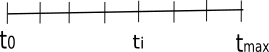

In [6]:
Image(filename='time_grid.png')

## Explicit Euler method

* Intuitive,


* Fast,


* Slow convergence,

$$
X_{i+1} = X_i + \Delta t \, f(X, t_i) 
$$

In [7]:
def Euler(func, X0, t):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1): 
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

In [8]:
Nt = 20
tv = np.linspace(0., tmax, Nt)
Xe = Euler(Derivative, [1., 0.], tv)
tl = ["$t_{{{0}}}$".format(i) for i in range(Nt)]

In [9]:
plt.figure()

plt.plot(ts, xs, "k--", label = "Closed Form Solution")
plt.plot(tv, Xe[:, 0], "or-", label = "Euler")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.legend(loc = "best")
plt.xticks(tv, tl)
plt.show()
#plt.close()

<IPython.core.display.Javascript object>

## Solution accuracy

In [10]:
markers = "osv*<>"
Nt_values = np.array([5, 10, 20, 100])
plt.figure()
for i in range(len(Nt_values)):
    tvi = np.linspace(0., tmax, Nt_values[i])
    Xei = Euler(Derivative, [1., 0.], t =  tvi)
    xsi = Solution(tvi)
    #plt.plot(tvi, (Xei[:, 0] - xsi) / a0 * 100, 
             #markers[i] + "-", label = "Euler, Nt = {0}".format(Nt_values[i]))
    plt.plot(tvi, np.abs(Xei[:, 0] - xsi), markers[i] + "-", label = "Euler, Nt = {0}".format(Nt_values[i]))
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Error")
plt.legend(loc = "best");

<IPython.core.display.Javascript object>


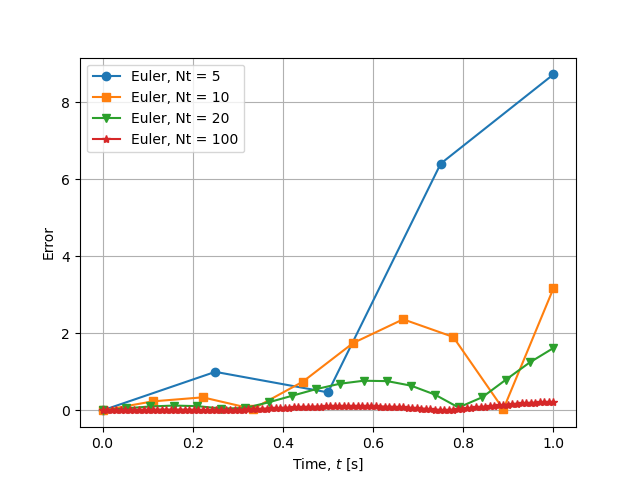

In [11]:
plt.show()
plt.close()

## Convergence order 

$$e = C (\Delta t)^p$$


So passing by the logarithm we have the following equation :

$$\underbrace{\log(e)}_{y} = C + p \underbrace{\log(\Delta t)}_{x}$$

In [12]:
markers = "osv*<>"
Nt_values = np.logspace(1., 4., 20).astype(np.int32)
dt_values = tmax / (Nt_values -1)
Error = []
for i in range(len(Nt_values)):
    tvi = np.linspace(0., tmax, Nt_values[i])
    Xei = Euler(Derivative, [1., 0.], t =  tvi)
    xsi = Solution(tvi)
    e = (Xei[:, 0] - xsi).std()
    Error.append(e)
    
plt.figure()
plt.plot(dt_values, Error, "or-", label = "Explicit Euler error")
plt.plot(dt_values, dt_values, label = "$\Delta t$", linestyle ="--")
plt.grid()
plt.legend()
plt.xlabel("Times step, $\Delta t$ [s]")
plt.ylabel("Error (Standard Deviation)")
plt.yscale("log")
plt.xscale("log")

<IPython.core.display.Javascript object>


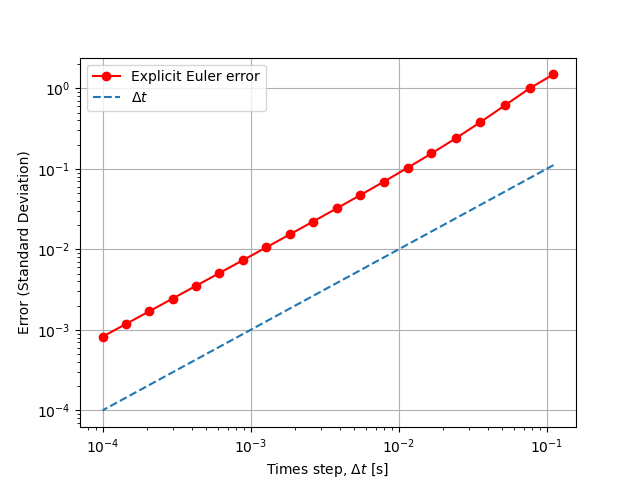

In [13]:
plt.show()
plt.close()

The Explicit Euler method is of order 1

## Runge Kutta 4

[Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Explicit_Runge.E2.80.93Kutta_methods)

Evolution of the Euler integrator with :

* Multi point slope evaluation (4 here),


* Well chosen weighting to match simple solutions.

$$
X_{i+1} = X_i + \dfrac{\Delta t}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)
$$


With : 


* $k_1$ is the increment based on the slope at the beginning of the interval, using $X$ (Euler's method);


* $k_2$ is the increment based on the slope at the midpoint of the interval, using  $\displaystyle X + \frac{\Delta t}{2} \times k_1$;


* $k_3$ is again the increment based on the slope at the midpoint, but now using    $\displaystyle X + \frac{\Delta t}{2} \times k_2$;


*  $k_4$ is the increment based on the slope at the end of the interval, using       $\displaystyle X + \Delta t \times k_3$.

In [14]:
def RK4(func, X0, t):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i])
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2.)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2.)
        k4 = func(X[i] + dt    * k3, t[i] + dt)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

In [15]:
Xrk4 = RK4(Derivative, [1., 0.], tv)
plt.figure()
plt.plot(ts, xs, "k--", label = "Closed Form Solution", linewidth = 2.)
plt.plot(tv, Xe[:, 0], "or-", label = "Euler")
plt.plot(tv, Xrk4[:, 0], "sg-", label = "RK4")
plt.xticks(tv, tl)
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.legend(loc = "best");

<IPython.core.display.Javascript object>


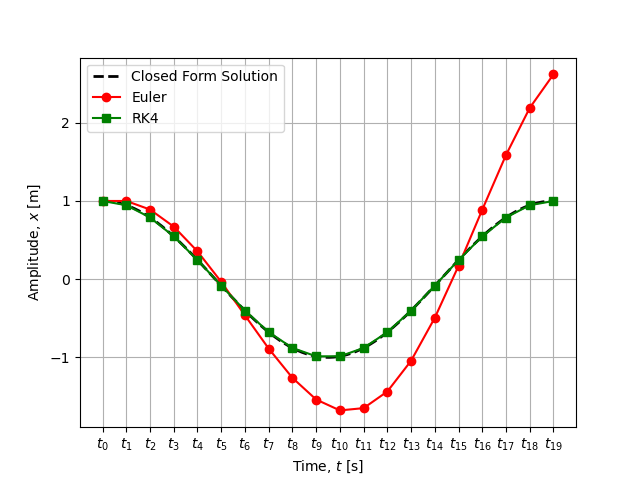

In [16]:
plt.show()
plt.close()

## ODEint (with Scipy)

State of the art solver from open source Fortran library **ODEPACK**. 

It is available in the scientic librairy `scipy.integrate.odeint`. 

Cf. [documentation](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.integrate.odeint.html)

In [17]:
Xodeint = integrate.odeint(Derivative, [1., 0.], tv)
plt.figure()
plt.plot(ts, xs, "k--", label = "Closed Form Solution", linewidth = 2.)
plt.plot(tv, Xe[:, 0], "or-", label = "Euler")
plt.plot(tv, Xrk4[:, 0], "sg-", label = "RK4")
plt.plot(tv, Xodeint[:, 0], "*m-", label = "ODEint")
plt.xticks(tv, tl)
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.legend(loc = "best");

<IPython.core.display.Javascript object>


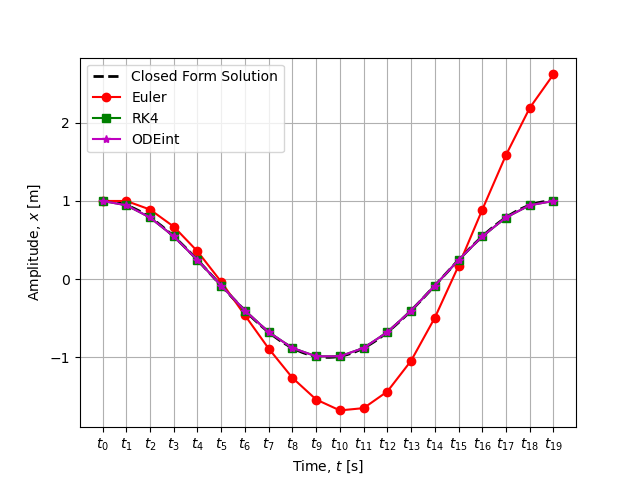

In [18]:
plt.show()
plt.close()

Notice that there are other native Python's methods for solving ODE in Scipy module such as 


`scipy.integrate.solve_ivp` or `scipy.integrate.ode` 

## Implicit methods

### Motivations 

* Equation stiffness


* Stability of the solution


## Backward Euler

### Pros / Cons

Pros :

* More accurate

Cons :

* Have to solve an equation


* More difficult to implement because it requires to use one of reccursive root finding methods (secant, Newton-Raphson).


$$
X_{i+1}  = X_{i} + \Delta t \, f(X, t_{i+1})  
$$


In [19]:
from scipy.optimize import fsolve

In [20]:
def EulerImp(func, X0, t):
    """
    Euler Implicit solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        func_eq = lambda Xnp : Xnp - X[i] + dt * func(Xnp, t[i+1])
        X[i+1] = fsolve(func_eq, X[i])
            
    return X

In [21]:
Xeimp = EulerImp(Derivative, [1., 0.], tv)
plt.figure()
plt.plot(ts, xs, "k--", label = "Closed form solution", linewidth = 2.)
plt.plot(tv, Xe[:, 0], "or-", label = "Euler explicit")
plt.plot(tv, Xrk4[:, 0], "sg-", label = "RK4")
plt.plot(tv, Xodeint[:, 0], "*m-", label = "ODEint")
plt.plot(tv, Xeimp[:,0], ">b-", label="Euler implicit")
plt.xticks(tv, tl)
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.legend(loc = "best");

<IPython.core.display.Javascript object>


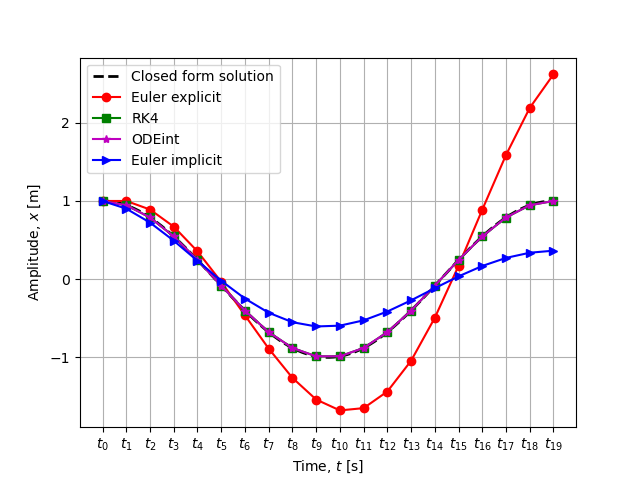

In [22]:
plt.show()

In [23]:
Nt_values = np.logspace(1., 4., 20).astype(np.int32)
dt_values = tmax / (Nt_values -1)
ErrorE = []
ErrorRK4 = []
ErrorODEint = []
ErrorEImp = []
for i in range(len(Nt_values)):
    tvi = np.linspace(0., tmax, Nt_values[i])
    Xei = Euler(Derivative, [1., 0.], t =  tvi)
    Xrk4i = RK4(Derivative, [1., 0.], t =  tvi)
    Xodeinti = integrate.odeint(Derivative, [1., 0.], t =  tvi)
    XeImpi = EulerImp(Derivative, [1., 0.], t =  tvi)
    xsi = Solution(tvi)
    ErrorE.append((Xei[:, 0] - xsi).std())
    ErrorRK4.append((Xrk4i[:, 0] - xsi).std())
    ErrorODEint.append((Xodeinti[:, 0] - xsi).std())
    ErrorEImp.append((XeImpi[:, 0] - xsi).std())
    
plt.figure()
plt.plot(dt_values, ErrorE, "or-", label = "Euler")
plt.plot(dt_values, ErrorRK4, "sg-", label = "RK4")
plt.plot(dt_values, ErrorODEint, "*m-", label = "ODEint")
plt.plot(dt_values, ErrorEImp, "+b-", label = "EulerImp")
plt.plot(dt_values, dt_values, label = "$\Delta t$", linestyle ="--")
plt.plot(dt_values, dt_values**4, label = "$\Delta t^4$", linestyle ="--")
plt.grid()
plt.xlabel("Times step, $\Delta t$ [s]")
plt.ylabel("Error (Standard Deviation)")
plt.legend(loc = "best")
plt.yscale("log")
plt.xscale("log")

<IPython.core.display.Javascript object>


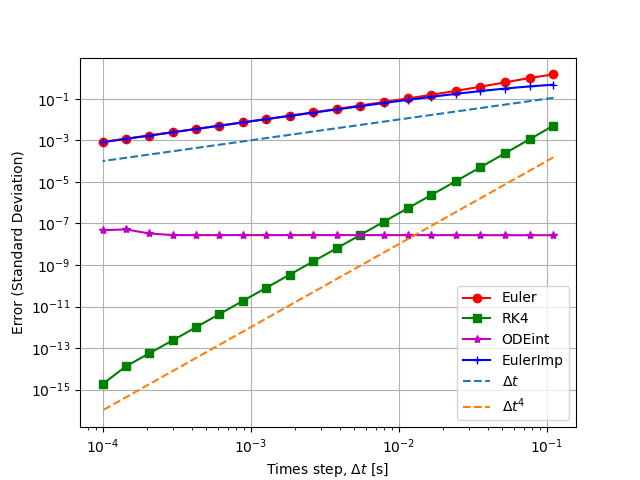

In [24]:
plt.show()

In this course we have only seen one-step numerical schemes, i.e., the methods consisting in computing the quantities $X_i$ that are expected to be approximations of $X(t_i)$ defined by : 

$$X_{i+1} = X_{i} + \Delta t \ \Phi(X, t_i, \Delta t) \quad \forall \ 0 \leq i \leq N-1$$ 


* $\Phi(X, t_i, \Delta t) := f(X, t_i)$ for explicit Euler method


* $\Phi(X, t_i, \Delta t) := f(X, t_{i+1})$ for implicit Euler method 


* $\Phi(X, t_i, \Delta t) := \displaystyle \frac{1}{6} \left(k_1 + 2 k_2 + 2 k_3 + k_4 \right)$ for RK4 method


For those who want to go further, there is another class of numerical methods which are the **multi-step methods**. After a start-up period, one can use the approximate values of $X$ : $X_{i-1}, X_{i-2},..., X_{i-k+1}$ at the steps preceding $X_i$. 

Some classical examples : 

* Adams methods : Adams-Bashforth, Adams-Moulton
* Nyström
* Milne-Simpson
* Backward differentiation formulas (BDF)

[Multistep methods](https://en.wikipedia.org/wiki/Linear_multistep_method#:~:text=Multistep%20methods%20attempt%20to%20gain,previous%20points%20and%20derivative%20values.)